In [1]:
import numpy as np 
import pandas as pd

In [2]:
csvfile = 'C:/Users/srijal/Desktop/Kagle CSV/dataset_attack.csv'

In [3]:
concat_df = pd.concat(map(pd.read_csv, ['C:/Users/srijal/Desktop/Kagle CSV/dataset_attack.csv',
                                       'C:/Users/srijal/Desktop/Kagle CSV/dataset_normal.csv']))
concat_df.dataframName = 'newcsvfile.csv'

In [4]:
nRow, nCol = concat_df.shape
print(f' There are {nRow} rows and {nCol} columns')

 There are 5658998 rows and 29 columns


In [5]:
concat_df.info() #See weather it did concat or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658998 entries, 1 to 1
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   frame.encap_type  int64  
 1   frame.len         object 
 2   frame.protocols   int64  
 3   ip.hdr_len        int64  
 4   ip.len            int64  
 5   ip.flags.rb       int64  
 6   ip.flags.df       int64  
 7   p.flags.mf        int64  
 8   ip.frag_offset    int64  
 9   ip.ttl            int64  
 10  ip.proto          object 
 11  ip.src            object 
 12  ip.dst            int64  
 13  tcp.srcport       int64  
 14  tcp.dstport       int64  
 15  tcp.len           int64  
 16  tcp.ack           int64  
 17  tcp.flags.res     int64  
 18  tcp.flags.ns      int64  
 19  tcp.flags.cwr     int64  
 20  tcp.flags.ecn     int64  
 21  tcp.flags.urg     int64  
 22  tcp.flags.ack     int64  
 23  tcp.flags.push    int64  
 24  tcp.flags.reset   int64  
 25  tcp.flags.syn     int64  
 26  tcp.flags.fin     in

In [6]:
concat_df.head() #see the head

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.0,attack
1,62,eth:ethertype:ip:udp:data,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.0,attack


In [7]:
concat_df['tcp.time_delta'].unique() #see how many unique attributes are ther in tcp.time_delta

array(['attack', 'normal'], dtype=object)

In [8]:
concat_df = concat_df.assign( yfeature = lambda dataframe:
                          dataframe['tcp.time_delta'].
                          map(lambda val: 'ATTACK' if val == 'attack' 
                              else 'NORMAL') 
  )

In [9]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [10]:
allnum_df=handle_non_numerical_data(concat_df)
allnum_df.info()
allnum_df.nunique(axis=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658998 entries, 1 to 1
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   frame.encap_type  int64  
 1   frame.len         int64  
 2   frame.protocols   int64  
 3   ip.hdr_len        int64  
 4   ip.len            int64  
 5   ip.flags.rb       int64  
 6   ip.flags.df       int64  
 7   p.flags.mf        int64  
 8   ip.frag_offset    int64  
 9   ip.ttl            int64  
 10  ip.proto          int64  
 11  ip.src            int64  
 12  ip.dst            int64  
 13  tcp.srcport       int64  
 14  tcp.dstport       int64  
 15  tcp.len           int64  
 16  tcp.ack           int64  
 17  tcp.flags.res     int64  
 18  tcp.flags.ns      int64  
 19  tcp.flags.cwr     int64  
 20  tcp.flags.ecn     int64  
 21  tcp.flags.urg     int64  
 22  tcp.flags.ack     int64  
 23  tcp.flags.push    int64  
 24  tcp.flags.reset   int64  
 25  tcp.flags.syn     int64  
 26  tcp.flags.fin     in

frame.encap_type      1455
frame.len              450
frame.protocols          3
ip.hdr_len            1463
ip.len                   1
ip.flags.rb              2
ip.flags.df              2
p.flags.mf               5
ip.frag_offset         113
ip.ttl                   5
ip.proto              6479
ip.src               10500
ip.dst               10897
tcp.srcport          11179
tcp.dstport           1461
tcp.len             851063
tcp.ack                  2
tcp.flags.res            2
tcp.flags.ns             2
tcp.flags.cwr            2
tcp.flags.ecn            1
tcp.flags.urg            2
tcp.flags.ack            2
tcp.flags.push           2
tcp.flags.reset          2
tcp.flags.syn            2
tcp.flags.fin        18953
tcp.window_size     450604
tcp.time_delta           2
yfeature                 2
dtype: int64

In [11]:
allnum_df.drop('tcp.time_delta', inplace=True, axis=1)

In [12]:
allnum_df

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,yfeature
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,62,51,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,60,113,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001240,1
1,1434,113,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002506,1
1,60,113,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001244,1
1,1434,113,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002505,1


In [13]:
# import packages start featurewiz 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score 
np.random.seed(1234)

In [14]:
from featurewiz import featurewiz

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [15]:
#Split the data into independent features and target.

X = allnum_df.drop(['yfeature'],axis=1)
 
y = allnum_df.yfeature.values

In [16]:
#Then Standardize the features by using StandardScaler from scikit-learn.

X_scaled = StandardScaler().fit_transform(X)

In [17]:
#Split the data into train and validate sets. 20% of the data will be used for validation.

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [19]:
#Create and train the RandomForestclassifier on the train set.

randclass = RandomForestClassifier()
 
randclass.fit(X_train,y_train)
# make prediction 
preds = randclass.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid)

0.9953728573952996

In [18]:
allnum_df

,frame.encap_type,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,...,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,yfeature
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,212,51,20,198,0,0,0,0,112,17,...,0,0,0,0,0,0,0,0,0.000000,0
1,62,51,20,48,0,0,0,0,128,17,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,60,113,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001240,1
1,1434,113,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002506,1
1,60,113,20,40,0,1,0,0,128,6,...,0,0,1,0,0,0,0,16560,0.001244,1
1,1434,113,20,1420,0,1,0,0,113,6,...,0,0,1,0,0,0,0,65019,0.002505,1


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (5658998, 29)
    Caution: We will try to reduce the memory usage of dataframe from 1295.24 MB
        memory usage after optimization is: 334.60 MB
        decreased by 74.2%
    Loaded train data. Shape = (5658998, 29)
 setting a hard limit of 900K samples for train since some it is huge and breaks pandas...
    Some column names had special characters which were removed...

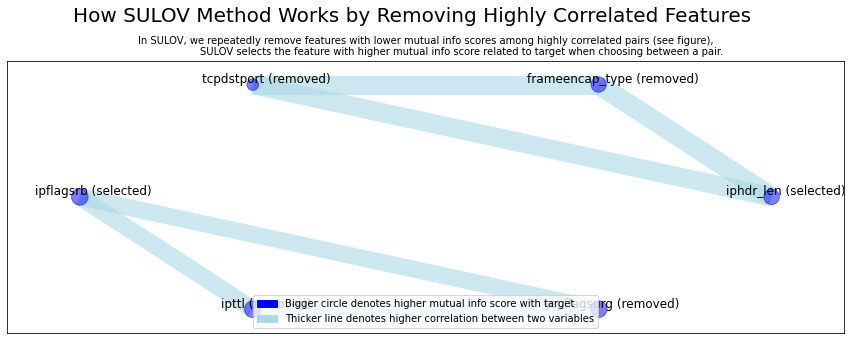

Time taken for SULOV method = 61 seconds
    Adding 0 categorical variables to reduced numeric variables  of 18
Final list of selected vars after SULOV = 18
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 18 
    XGBoost version: 1.6.1
Number of booster rounds = 20
        using 18 variables...
            Time taken for regular XGBoost feature selection = 9 seconds
        using 14 variables...
            Time taken for regular XGBoost feature selection = 17 seconds
        using 10 variables...
            Time taken for regular XGBoost feature selectio

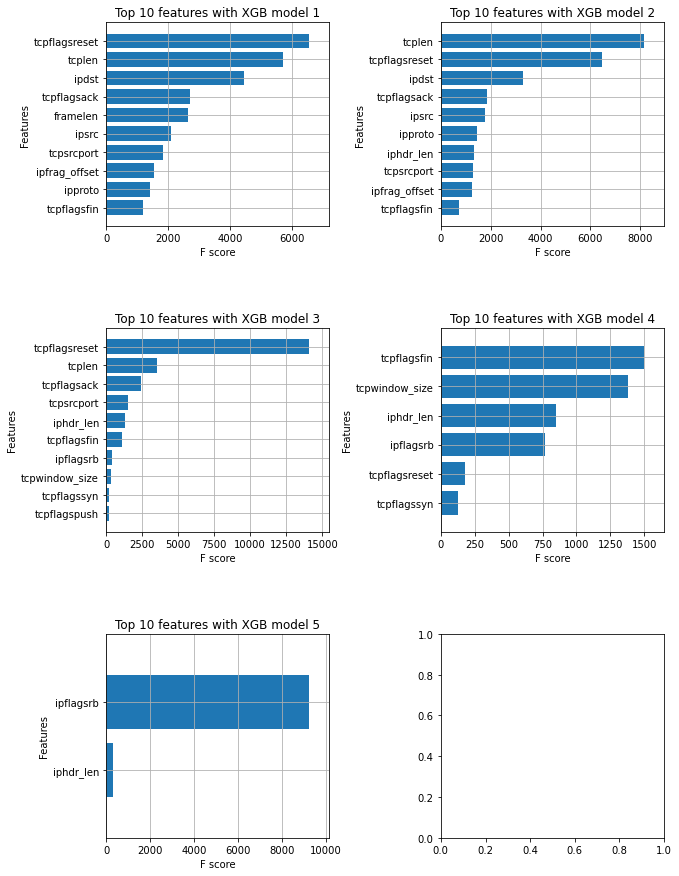

            Total time taken for XGBoost feature selection = 30 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['tcpflagsreset', 'tcplen', 'ipdst', 'tcpflagsack', 'framelen', 'ipsrc', 'tcpsrcport', 'ipfrag_offset', 'ipproto', 'tcpflagsfin', 'iphdr_len', 'ipflagsrb', 'tcpwindow_size', 'tcpflagssyn', 'tcpflagspush']

    Time taken for feature selection = 91 seconds
Returning 2 dataframes: dataname and test_data with 15 important features.


In [19]:
# automatic feature selection by using featurewiz package
target = 'yfeature'
 
features, train = featurewiz(allnum_df, target, corr_limit=0.6, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [20]:
print(features)

['tcp.flags.reset', 'tcp.len', 'ip.dst', 'tcp.flags.ack', 'frame.len', 'ip.src', 'tcp.srcport', 'ip.frag_offset', 'ip.proto', 'tcp.flags.fin', 'ip.hdr_len', 'ip.flags.rb', 'tcp.window_size', 'tcp.flags.syn', 'tcp.flags.push']


In [21]:
#split data into feature and target

X_new = train.drop(['yfeature'],axis=1)
 
y = train.yfeature.values

In [22]:
# preprocessing the features

X_scaled =  StandardScaler().fit_transform(X_new)

In [23]:
#split data into train and validate 
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [24]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [25]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
nn_model = model.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
72000/72000 [==============================] - 85s 1ms/step - loss: 0.2003 - accuracy: 0.9119
Epoch 2/300
72000/72000 [==============================] - 84s 1ms/step - loss: 0.1479 - accuracy: 0.9361
Epoch 3/300
72000/72000 [==============================] - 89s 1ms/step - loss: 0.1336 - accuracy: 0.9426
Epoch 4/300
72000/72000 [==============================] - 80s 1ms/step - loss: 0.1245 - accuracy: 0.9468
Epoch 5/300
72000/72000 [==============================] - 77s 1ms/step - loss: 0.1183 - accuracy: 0.9496
Epoch 6/300
72000/72000 [==============================] - 78s 1ms/step - loss: 0.1127 - accuracy: 0.9523
Epoch 7/300
72000/72000 [==============================] - 77s 1ms/step - loss: 0.1082 - accuracy: 0.9546
Epoch 8/300
72000/72000 [==============================] - 83s 1ms/step - loss: 0.1052 - accuracy: 0.9565
Epoch 9/300
72000/72000 [==============================] - 80s 1ms/step - loss: 0.1016 - accuracy: 0.9576
Epoch 10/300
72000/72000 [====================

72000/72000 [==============================] - 80s 1ms/step - loss: 0.0708 - accuracy: 0.9718
Epoch 78/300
72000/72000 [==============================] - 90s 1ms/step - loss: 0.0703 - accuracy: 0.9721
Epoch 79/300
72000/72000 [==============================] - 84s 1ms/step - loss: 0.0698 - accuracy: 0.9720
Epoch 80/300
72000/72000 [==============================] - 86s 1ms/step - loss: 0.0709 - accuracy: 0.9721
Epoch 81/300
72000/72000 [==============================] - 84s 1ms/step - loss: 0.0696 - accuracy: 0.9722
Epoch 82/300
72000/72000 [==============================] - 83s 1ms/step - loss: 0.0694 - accuracy: 0.9726
Epoch 83/300
72000/72000 [==============================] - 82s 1ms/step - loss: 0.0703 - accuracy: 0.9724
Epoch 84/300
72000/72000 [==============================] - 83s 1ms/step - loss: 0.0696 - accuracy: 0.9723
Epoch 85/300
72000/72000 [==============================] - 79s 1ms/step - loss: 0.0705 - accuracy: 0.9726
Epoch 86/300
72000/72000 [========================

72000/72000 [==============================] - 74s 1ms/step - loss: 0.0661 - accuracy: 0.9740
Epoch 154/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0672 - accuracy: 0.9740
Epoch 155/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0666 - accuracy: 0.9741
Epoch 156/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0679 - accuracy: 0.9739
Epoch 157/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0660 - accuracy: 0.9742
Epoch 158/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0674 - accuracy: 0.9740
Epoch 159/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0670 - accuracy: 0.9741
Epoch 160/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0667 - accuracy: 0.9741
Epoch 161/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0660 - accuracy: 0.9741
Epoch 162/300
72000/72000 [===============

Epoch 229/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0678 - accuracy: 0.9743
Epoch 230/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0664 - accuracy: 0.9747
Epoch 231/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0674 - accuracy: 0.9745
Epoch 232/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0671 - accuracy: 0.9744
Epoch 233/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0662 - accuracy: 0.9745
Epoch 234/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0679 - accuracy: 0.9746
Epoch 235/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0659 - accuracy: 0.9746
Epoch 236/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0665 - accuracy: 0.9746
Epoch 237/300
72000/72000 [==============================] - 73s 1ms/step - loss: 0.0684 - accuracy: 0.9745
Epoch 238/300
72000/72000 [=

In [52]:
model.evaluate(X_valid,y_valid)

5625/5625 [==============================] - 6s 890us/step - loss: 0.0900 - accuracy: 0.9769


[0.0899730995297432, 0.9769166707992554]

In [40]:
import math
#y_pred_nn is the predcition and y_pred_prob is probabilities of the prediction
y_pred_nn=model.predict(X_valid)
#y_pred_prob=model.predict_proba(X_valid)

5625/5625 [==============================] - 5s 820us/step


In [41]:
##Set threshold all values above threshold are 1 and #below 0
y_pred_nn=y_pred_nn>0.5

In [42]:
## false means 0 and true means 1
print(y_pred_nn[:5])

[[False]
 [False]
 [ True]
 [False]
 [ True]]


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_nn,y_valid)

0.9728388888888889

In [51]:
#creating a confussion matrix and determining

confusion_matrix(y_pred_nn, y_valid)

tn,fp,fn,tp = confusion_matrix(y_pred_nn, y_valid).ravel()
(tn,fp,fn,tp)

(91613, 1233, 3656, 83498)

In [57]:
import matplotlib.pyplot as plt

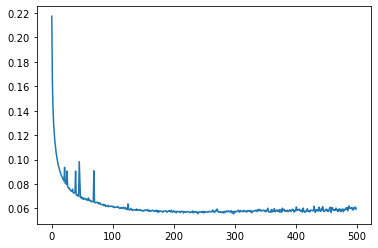

In [59]:
plt.plot(nn_model.history['loss'])